In [1]:
#Data
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#Viz imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas.io.data import DataReader

In [7]:
from datetime import datetime

In [8]:
from __future__ import division

In [9]:
tech_list = ['AAPL','MSFT','GOOG','AMZN']

In [10]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [14]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,116.050316,117.131028,114.784980,115.962332,4.959226e+07,114.744456
std,11.183665,11.021497,11.306862,11.122677,2.048537e+07,10.494202
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,110.000000,111.110001,107.860001,109.269997,3.575670e+07,108.391842
50%,116.580002,117.699997,115.500000,116.410004,4.577090e+07,115.543033
75%,126.099998,127.099998,125.160004,126.010002,5.567880e+07,124.070079
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-03-12 to 2016-03-11
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


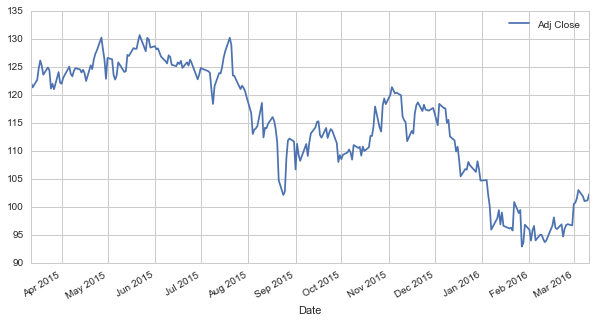

In [24]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,5))

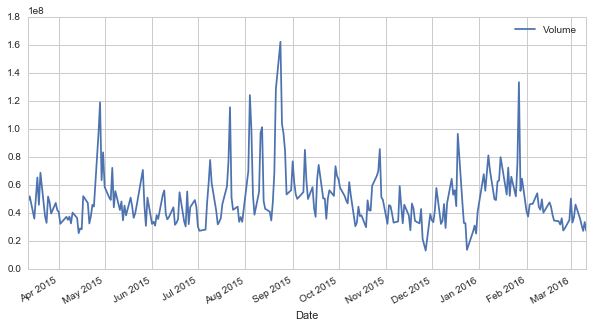

In [31]:
AAPL['Volume'].plot(legend=True,figsize=(10,5))

In [26]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

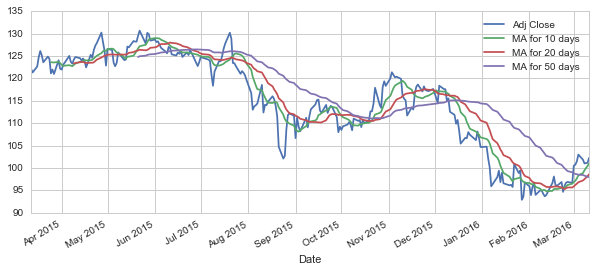

In [29]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

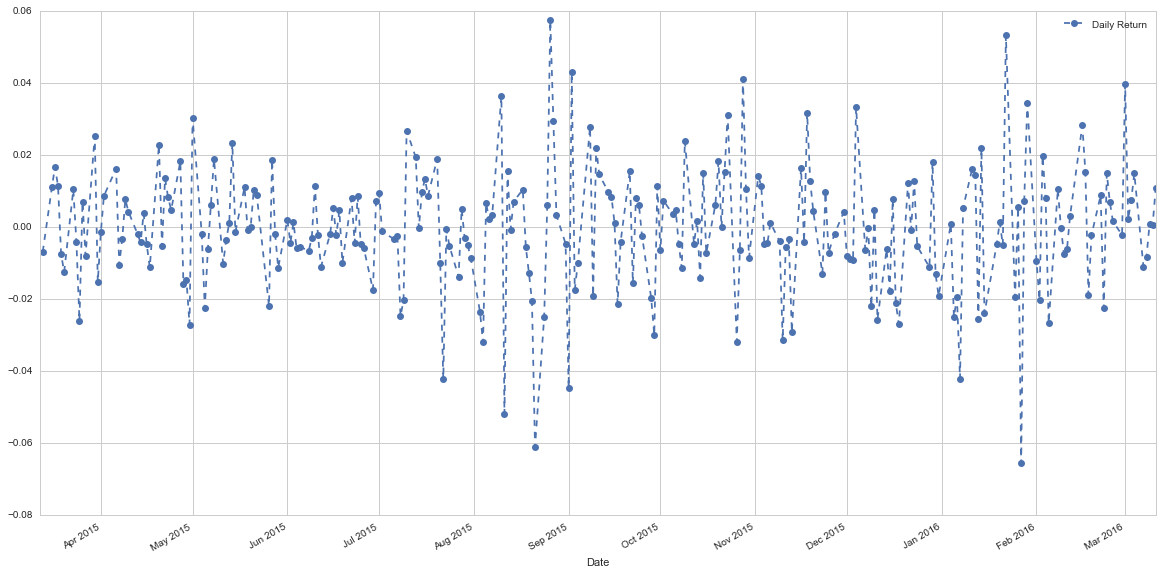

In [35]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (20,10), legend =True,linestyle='--',marker='o' )

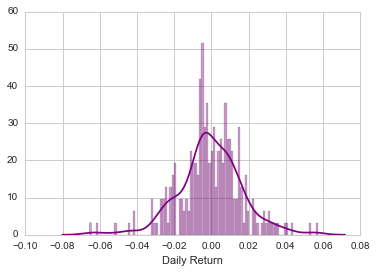

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

In [37]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [38]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-12,122.185017,374.239990,555.512505,39.930370
2015-03-13,121.340668,370.579987,547.322503,40.280807
2015-03-16,122.675917,373.350006,554.512509,40.456026
2015-03-17,124.727883,371.920013,550.842471,40.592307
2015-03-18,126.131857,375.140015,559.502513,41.371055


In [39]:
tech_rets = closing_df.pct_change()

In [41]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-12,NaN,NaN,NaN,NaN
2015-03-13,-0.006910,-0.009780,-0.014743,0.008776
2015-03-16,0.011004,0.007475,0.013137,0.004350
2015-03-17,0.016727,-0.003830,-0.006618,0.003369
2015-03-18,0.011256,0.008658,0.015721,0.019185


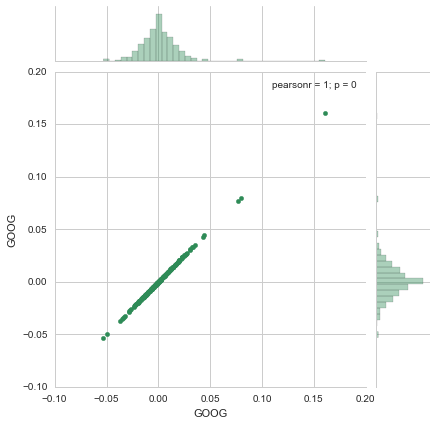

In [44]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

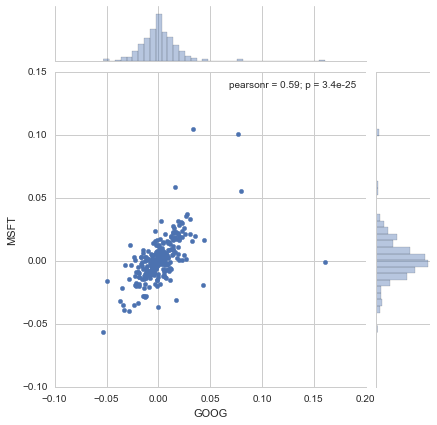

In [45]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')